# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [1]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1486k      0 --:--:-- --:--:-- --:--:-- 1482k--:--     0


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [3]:
query = '''
SELECT customers.*, experiences.duration AS work_experience, professions.category AS profession, COUNT(relatives.customer_id)+1 AS family_size 
FROM customers
LEFT JOIN relatives ON customers.id = relatives.customer_id  
LEFT JOIN experiences ON customers.id=experiences.customer_id
LEFT JOIN professions ON professions.id=experiences.profession_id
GROUP BY customers.id
'''

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('db/customers.sqlite')
df = pd.read_sql(query, conn)

In [5]:
df.head(10)

,id,gender,married,graduated,age,score,segment,work_experience,profession,family_size
0,1,Male,No,No,22,Low,D,1.0,Healthcare,4
1,2,Female,Yes,Yes,38,Average,A,NaN,Engineer,3
2,3,Female,Yes,Yes,67,Low,B,1.0,Engineer,1
3,4,Male,Yes,Yes,67,High,B,0.0,Lawyer,2
4,5,Female,Yes,Yes,40,High,A,NaN,Entertainment,6
5,6,Male,Yes,No,56,Average,C,0.0,Artist,2
6,7,Male,No,Yes,32,Low,C,1.0,Healthcare,3
7,8,Female,No,Yes,33,Low,D,1.0,Healthcare,3
8,9,Female,Yes,Yes,61,Low,D,0.0,Engineer,3
9,10,Female,Yes,Yes,55,Average,C,1.0,Artist,4


In [6]:
df.shape

(8068, 10)

#### 💾 Save your results

Run the following cell to save your results.

In [7]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [8]:
customers = pd.read_csv('data/customers.csv')

**💾 Save your results**

Run the following cell to save your results.

In [9]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [10]:
# Start your data analysis!
customers.groupby("Segmentation").agg(['mean', 'std'])

ID                     Age             \
                       mean          std       mean        std   
Segmentation                                                     
A             463457.893002  2585.220444  44.924949  16.406909   
B             463520.253498  2550.208040  48.200215  14.806443   
C             463576.043655  2633.377643  49.144162  14.575090   
D             463380.026896  2605.525629  33.390212  15.680304   

             Work_Experience           Family_Size            
                        mean       std        mean       std  
Segmentation                                                  
A                   2.874578  3.603993    2.439531  1.482015  
B                   2.378151  3.225626    2.696970  1.408615  
C                   2.240771  3.046297    2.974559  1.377322  
D                   3.021717  3.622962    3.232624  1.693600

In [11]:
customers.groupby('Segmentation').Spending_Score.value_counts()

Segmentation  Spending_Score
A             Low               1358
              Average            343
              High               271
B             Low                884
              Average            590
              High               384
C             Average            903
              Low                662
              High               405
D             Low               1974
              High               156
              Average            138
Name: Spending_Score, dtype: int64

In [12]:
customers.groupby('Segmentation').Graduated.value_counts()

Segmentation  Graduated
A             Yes          1219
              No            729
B             Yes          1332
              No            508
C             Yes          1607
              No            348
D             No           1437
              Yes           810
Name: Graduated, dtype: int64

In [13]:
1437/(1437+810)

0.6395193591455274

In [14]:
customers.groupby('Segmentation').Ever_Married.value_counts()

Segmentation  Ever_Married
A             Yes             1137
              No               801
B             Yes             1348
              No               479
C             Yes             1549
              No               398
D             No              1607
              Yes              609
Name: Ever_Married, dtype: int64

In [15]:
1607/(1607+609)

0.7251805054151624

In [16]:
customers.groupby('Segmentation').Profession.value_counts()

Segmentation  Profession   
A             Artist            558
              Entertainment     365
              Engineer          259
              Doctor            199
              Lawyer            197
              Executive         125
              Healthcare        106
              Homemaker          73
              Marketing          57
B             Artist            756
              Entertainment     221
              Engineer          189
              Executive         183
              Lawyer            158
              Doctor            143
              Healthcare        101
              Homemaker          55
              Marketing          30
C             Artist           1065
              Executive         175
              Entertainment     148
              Healthcare        146
              Doctor            140
              Lawyer            140
              Engineer           75
              Marketing          35
              Homemaker          28


In [17]:
979/(979+215+206+176+170+137+128+116+90)

0.4415877311682454

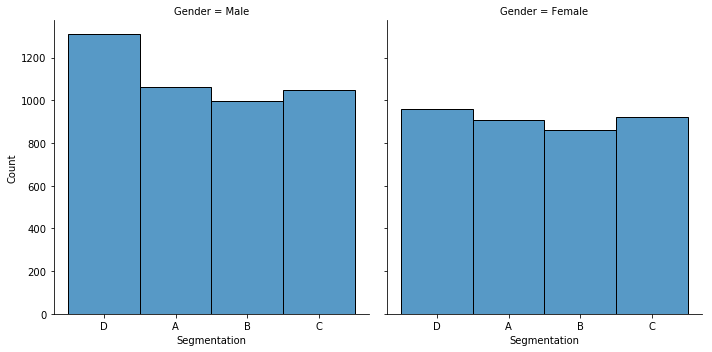

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(customers, x="Segmentation", col="Gender",  multiple="dodge")

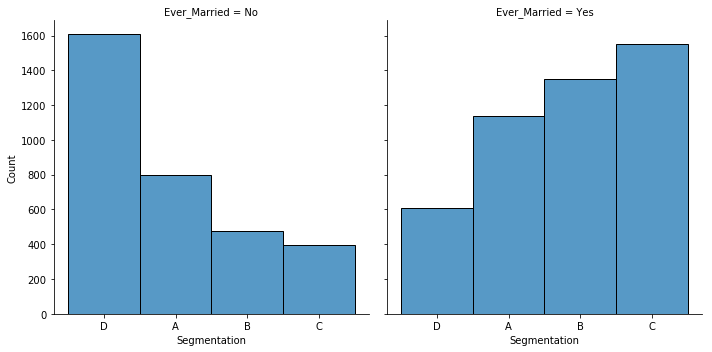

In [19]:
sns.displot(customers, x="Segmentation", col="Ever_Married", multiple="dodge")


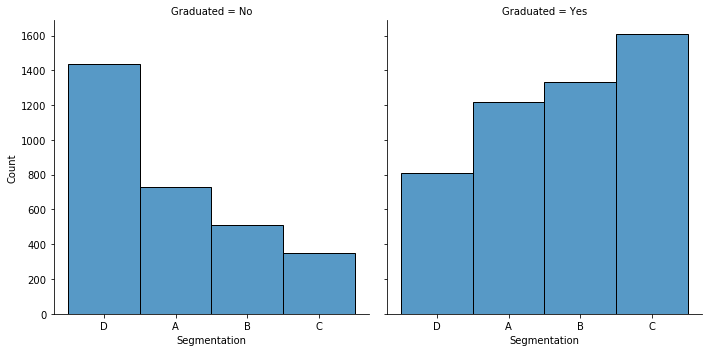

In [20]:
sns.displot(customers, x="Segmentation", col="Graduated", multiple="dodge")

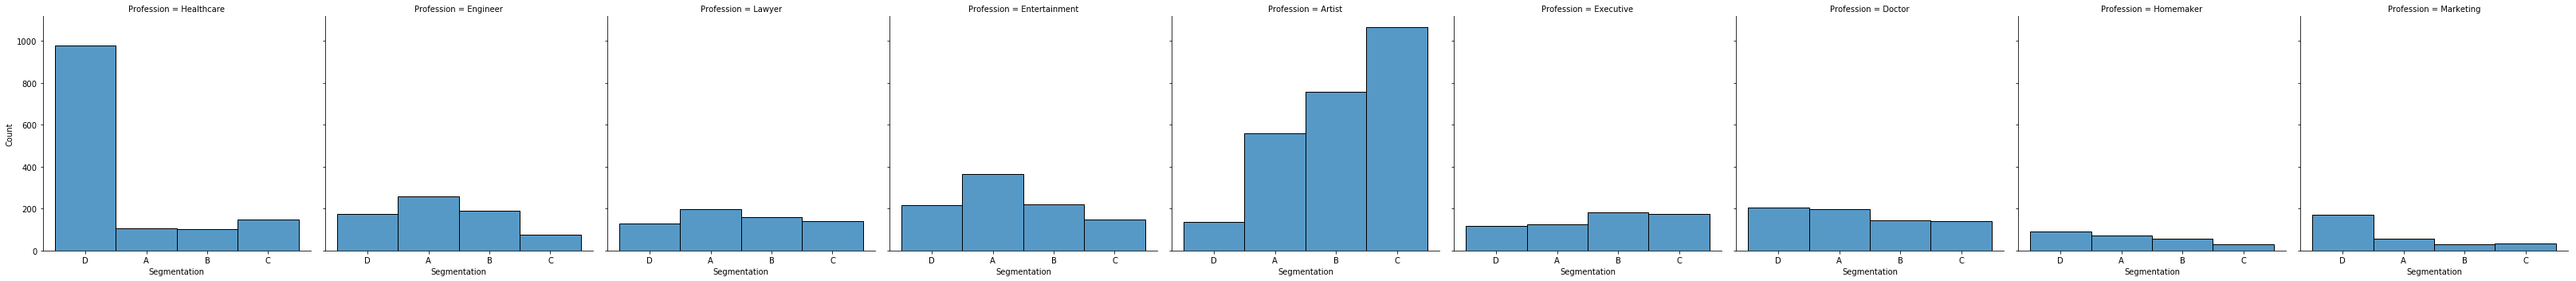

In [21]:
sns.displot(customers, x="Segmentation", col="Profession", multiple="dodge")

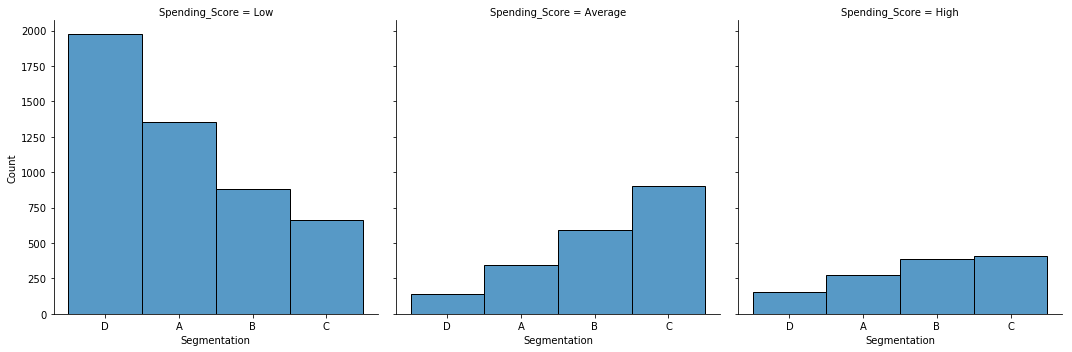

In [22]:
sns.displot(customers, x="Segmentation", col="Spending_Score", multiple="dodge")

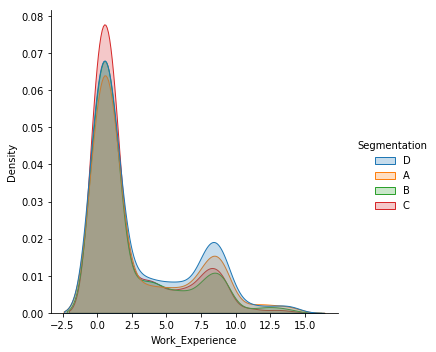

In [23]:
sns.displot(customers, x="Work_Experience", hue="Segmentation", kind="kde", fill=True)

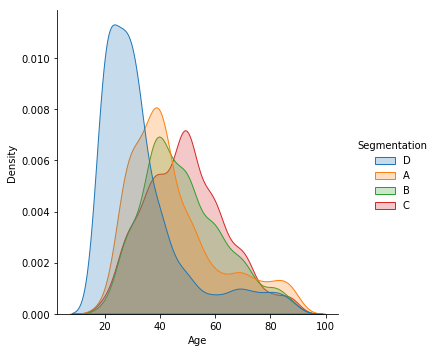

In [24]:
sns.displot(customers, x="Age", hue="Segmentation", kind="kde", fill=True)

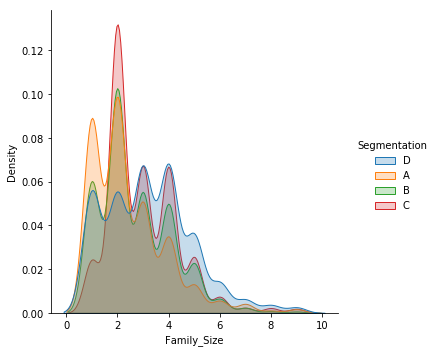

In [25]:
sns.displot(customers, x="Family_Size", hue="Segmentation", kind="kde", fill=True)

### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

In [26]:
n_clusters=3

**💾 Save your results**

Run the following cell to save your results.

In [27]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [28]:
# Load the data and display the first rows
df_D = pd.read_csv('data/customers_encoded.csv')

In [29]:
df_D

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,is_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,D,1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D,1
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D,1
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B,0


After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

In [32]:
# Test
import statsmodels.formula.api as smf
model = smf.logit(formula='is_D ~ Age', data=df_D).fit()

Optimization terminated successfully.
         Current function value: 0.507995
         Iterations 6


In [33]:
p_value=model.pvalues

In [34]:
p_value

Intercept    7.425076e-102
Age          3.283952e-213
dtype: float64

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [35]:
odds=df_D.is_D.mean()

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [41]:
married = df_D[df_D['Ever_Married']=='Yes']
married_and_graduated = married[married['Graduated']=='Yes']

In [43]:
model2 = smf.logit(formula='is_D ~ Age', data=married_and_graduated).fit()

Optimization terminated successfully.
         Current function value: 0.285276
         Iterations 7


In [44]:
model2.params

Intercept   -1.242967
Age         -0.023062
dtype: float64

In [47]:
import math
odds_variation=math.exp(-0.023062)

In [48]:
odds_variation

0.9772018953775428

####  💾 Save your results

Run the following cell to save your results.

In [ ]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**